In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

From equation 3.2 of *Monteo Carlo Methods in Financial Engineering* if $\{ W(t), 0 \leq t \leq T\}$ is a Brownian motion process then if $t_0 = 0$ and $W(0) = 0$ then we have
$$
W(t_{i+1}) = W(t_i) + \sqrt{t_{i+1} - t_i} Z_{i+1}
$$
where the $Z_i$ are independent standard normal random variables.

In [11]:
mu, sigma = 0.0, 1.0

In [1]:
paths = 50

steps = 1000

In [4]:
W = np.zeros((paths, steps))

In [12]:
Z = np.random.normal(mu, sigma, (paths, steps))

In [13]:
interval = [0.0, 1.0]

dt = (interval[1] - interval[0]) / (steps - 1)

In [14]:
t_axis = np.linspace(interval[0], interval[1], steps)

In [16]:
for i in range(1, steps):
    W[:, i] = W[:, i-1] + Z[:, i]

In [26]:
data = {
    "x": t_axis,
    "y": W
}

<Axes: xlabel='x', ylabel='y'>

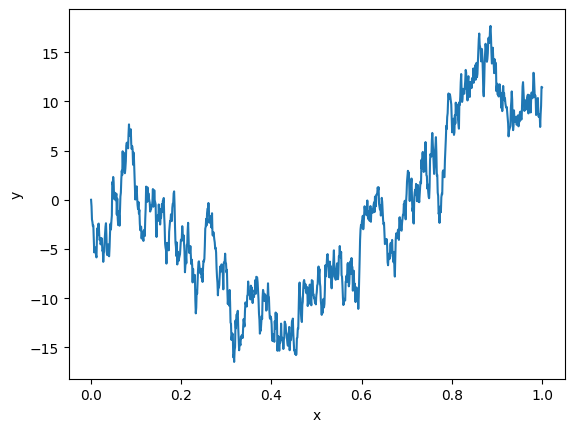

In [21]:
sns.lineplot(pd.DataFrame(data), x="x", y="y")

In [24]:
flights = sns.load_dataset("flights")

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<Axes: xlabel='year'>

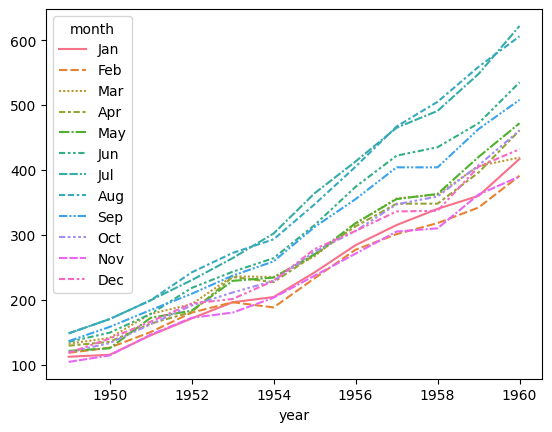

In [25]:
sns.lineplot(data=flights_wide)


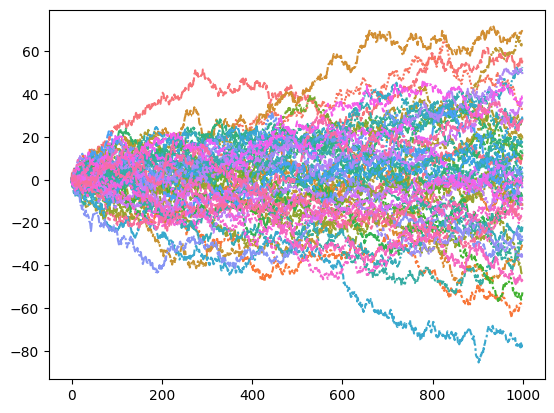

In [37]:
df = pd.DataFrame(W).T

df.set_index(t_axis)

sns.lineplot(data=df)
plt.legend([],[], frameon=False)

